## Installing Tensorflow

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## Importing Required Libraries

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

## Checking Directories

In [14]:
img = image.load_img("train/bio/cardboard1.jpg")

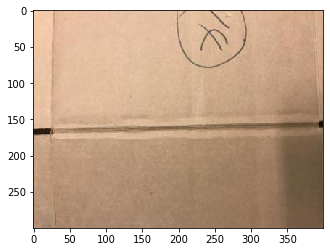

In [16]:
plt.imshow(img)

In [17]:
cv2.imread('train/bio/cardboard1.jpg').shape

(300, 400, 3)

## Generator

In [3]:
train = ImageDataGenerator(rescale = 1/255,shear_range = 0.2, zoom_range = 0.2, 
                           brightness_range = (0.1, 0.5), horizontal_flip=True)

In [4]:
train_dataset = train.flow_from_directory('train',
                                         target_size = (200, 200),
                                         batch_size = 10,
                                         class_mode = 'binary')

Found 2504 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'bio': 0, 'non_bio': 1}

## Model

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16 = VGG16(input_shape = (200, 200, 3), weights = "imagenet", include_top = False)

58892288/58889256 [==============================] - 16s 0us/step


In [7]:
for layer in vgg16.layers:
    layer.trainable = False

In [8]:
from tensorflow.keras import layers
x = layers.Flatten()(vgg16.output)

In [12]:
prediction = layers.Dense(units = 1, activation="sigmoid")(x)
model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

## Compiling and Fitting Model

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics =["accuracy"])
result = model.fit_generator(train_dataset, epochs = 5, steps_per_epoch=150)

Epoch 1/5
150/150 [==============================] - 213s 1s/step - loss: 0.4467 - accuracy: 0.7831
Epoch 2/5
150/150 [==============================] - 228s 2s/step - loss: 0.4023 - accuracy: 0.7990
Epoch 3/5
 74/150 [=============>................] - ETA: 1:52 - loss: 0.4376 - accuracy: 0.7872

## Prediction

In [19]:
from tensorflow.keras.preprocessing import image
output_class = ["Biodegradable", "Non - Biogradable"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (200,200))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print(predicted_value, " with ", predicted_accuracy, " % accuracy")

## Results

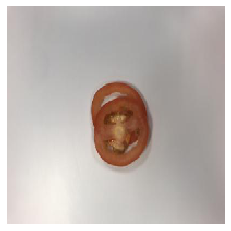

Biodegradable  with  98.31  % accuracy


In [20]:
waste_prediction('test/compost91.jpg')

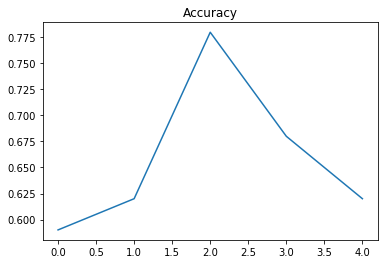

In [21]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()